In [52]:
import torch
import torchvision
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import json
import numpy as np

In [53]:
# Load the pre-trained Mask R-CNN model from torchvision
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [54]:
# Function to load the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = torchvision.transforms.ToTensor()(image).unsqueeze(0)
    return image, image_tensor

In [55]:
# Function to load the annotations (annotations.json)
def load_annotations(annotations_path):
    with open(annotations_path, 'r') as f:
        return json.load(f)

In [ ]:
# Function to get category names from annotations
def get_category_mapping(categories):
    category_mapping = {}
    for category in categories:
        category_mapping[category['id']] = category['name']
    return category_mapping

In [56]:
# Function to visualize predictions
def visualize_predictions(image, boxes, masks, labels, scores, annotations, threshold=0.5):
    draw = ImageDraw.Draw(image)
    categories = annotations['categories']
    category_mapping = get_category_mapping(categories)

    for i, box in enumerate(boxes):
        score = scores[i].item()
        if score < threshold:
            continue

        label = labels[i].item()
        category_name = category_mapping[label]

        caption = f"{category_name} {score:.2f}"

        font = ImageFont.load_default()  # Use default font

        # Use textbbox instead of textsize
        text_bbox = draw.textbbox((0, 0), caption, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

        text_position = (box[0], max(0, box[1] - text_height))

        # Draw bounding box and label
        draw.rectangle([box[0], box[1], box[2], box[3]], outline="red", width=10)
        draw.text(text_position, caption, fill="red", font=font)

        # Optional: Draw the mask if necessary (uncomment to show masks)
        mask = masks[i, 0] > 0.5  # If mask is present and significant
        mask = mask.cpu().numpy().astype(np.uint8)  # Convert to binary NumPy array

        # Create an RGBA image for the overlay with transparency (0-255)
        overlay = Image.new('RGBA', image.size, (0, 0, 0, 0))  # Transparent background

        # Apply the mask with a transparent green color
        green = (0, 255, 0, 128)  # Green color with alpha (transparency)

        # Apply the mask to the overlay
        overlay_np = np.array(overlay)
        overlay_np[mask == 1] = green  # Apply green color to the mask area

        # Convert the overlay back to an image
        overlay = Image.fromarray(overlay_np, 'RGBA')

        # Convert the original image to RGBA to support transparency
        image = image.convert("RGBA")

        # Combine the image and overlay with alpha blending
        image = Image.alpha_composite(image, overlay)

    # Convert the final image back to RGB for display
    image = image.convert("RGB")

    plt.imshow(image)
    plt.axis('off')
    plt.show()

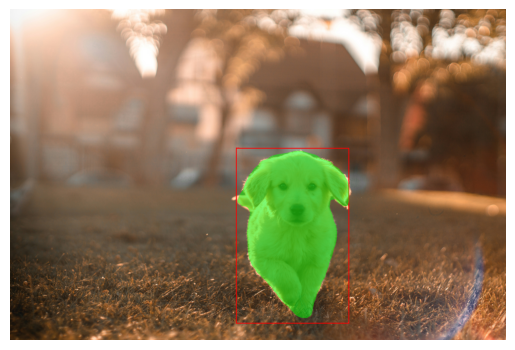

In [58]:
# Main function to run the code
def main():
    # Paths to your image and annotations
    image_path = "dog.jpg"  # Replace with your image file
    annotations_path = "annotations.json"  # Replace with your annotations.json file

    # Load image and annotations
    image, image_tensor = load_image(image_path)
    annotations = load_annotations(annotations_path)

    # Perform inference with Mask R-CNN
    with torch.no_grad():
        prediction = model(image_tensor)

    # Get prediction details
    boxes = prediction[0]['boxes']
    labels = prediction[0]['labels']
    scores = prediction[0]['scores']
    masks = prediction[0]['masks']

    # Visualize predictions (bounding boxes, labels, and scores)
    visualize_predictions(image, boxes, masks, labels, scores, annotations, threshold=0.5)

if __name__ == "__main__":
    main()

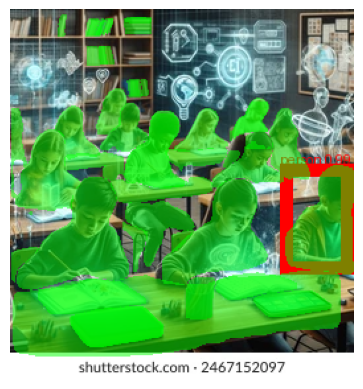

In [57]:
# Main function to run the code
def main():
    # Paths to your image and annotations
    image_path = "/content/students.webp"  # Replace with your image file
    annotations_path = "annotations.json"  # Replace with your annotations.json file

    # Load image and annotations
    image, image_tensor = load_image(image_path)
    annotations = load_annotations(annotations_path)

    # Perform inference with Mask R-CNN
    with torch.no_grad():
        prediction = model(image_tensor)

    # Get prediction details
    boxes = prediction[0]['boxes']
    labels = prediction[0]['labels']
    scores = prediction[0]['scores']
    masks = prediction[0]['masks']

    # Visualize predictions (bounding boxes, labels, and scores)
    visualize_predictions(image, boxes, masks, labels, scores, annotations, threshold=0.5)

if __name__ == "__main__":
    main()